In [ ]:
#references
'''
1. https://scipy.github.io/devdocs/generated/scipy.spatial.voronoi_plot_2d.html 
2. https://chrisalbon.com/machine_learning/model_evaluation/nested_cross_validation/
3. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
'''

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
def rmse(y1,y2):
    np.squeeze()

In [4]:
filname='Real estate valuation data set.xlsx'
df=pd.read_excel(filname)
df[:10]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [5]:
X=np.array(df)[:,:-1]
y=np.array(df)[:,-1]

In [6]:
X.shape

(414, 7)

In [7]:
y.shape

(414,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
cv_scores=[]
for k in range(1,15,2):
    knn = KNN(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

In [10]:
cv_scores

[0.18090481088582808,
 0.39548126680410867,
 0.49172375265765683,
 0.5140820336240364,
 0.5009554496475482,
 0.5052971829076494,
 0.5109845467302483]

In [ ]:
C_candidates = dict(n_neighbors=np.array(range(1,15,2)))

In [44]:
C_candidates
knn = KNN(n_neighbors=5)

In [12]:
clf = GridSearchCV(estimator=KNN(), param_grid=C_candidates, cv=5)

In [14]:
clf.fit(X_train, y_train)

# Show the best value for C
clf.best_estimator_.n_neighbors

7

In [28]:
kf=KFold(5)
x=kf.split(X_train)

In [65]:
def K_fold_cv( X, y,model, param_list=0, cv=5):
    kf=KFold(n_splits=cv)
    K_val=list(range(1,25,2))
    K_Opt=[]
    for train_index, test_index in kf.split(X,y):
        X_train=X[train_index]
        y_train=y[train_index]
        X_test=X[test_index]
        y_test=y[test_index]
        
        mean_errors=[]  #to store mean error for each k for each fold to get the opt k
        for k in K_val:
            knn=KNN(n_neighbors=k)
            error=0
            for tri, tsi in kf.split(X_train, y_train):
                X_train__=X_train[tri]
                y_train__=y_train[tri]
                X_vald=X_train[tsi]
                y_vald=y_train[tsi]
                knn.fit(X_train__, y_train__)
                y_pred=knn.predict(X_vald)
                error+=((sum((y_pred-y_vald)**2))/len(y_pred))**0.5
            mean_errors.append(error/cv)
        k_opt=K_val[mean_errors.index(min(mean_errors))]
        K_Opt.append(k_opt)
    return K_Opt

In [66]:
K_fold_cv(X_train, y_train,1, cv=8)

[21, 19, 21, 17, 21, 19, 17, 7]

## 2(C)

In [50]:
X_train_=X[:int(0.8*len(X))]
X_test_=X[int(0.8*len(X)):]
y_train_=y[:int(0.8*len(y))]
ground_truth_=y[int(0.8*len(y)):]
for i in [X_train_,X_test_,y_train_,ground_trouth_]:
    print(i.shape)

(331, 7)
(83, 7)
(331,)
(83,)


In [70]:
train_error=[]
test_error=[]
K=range(1,50,2)
for k in K:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train_, y_train_)
    y=knn.predict(X_test_)
    y_=knn.predict(X_train_)
    train_error.append((sum((y_-y_train_)**2)/len(y_))**0.5)
    test_error.append((sum((y-ground_truth_)**2)/len(y))**0.5)

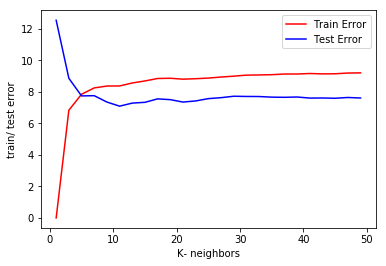

In [71]:
plt.plot(K,train_error,'r', label='Train Error')
plt.plot(K, test_error, 'b', label='Test Error')
plt.xlabel("K- neighbors")
plt.ylabel("train/ test error")
plt.legend()
plt.show()

In [52]:
a=[np.ones((5,5))]
a.squeeze()

AttributeError: 'list' object has no attribute 'squeeze'